# Madrid Daily Weather Report 1997-2015


After collecting a sample of the daily weather in Madrid from 1997 till 2015 we would like to make some analysis using the data given to understand more of the nature of the weather in Madrid and also to be able to make futrhur decisions based on the weather. This dataset was provided by Maven Analytics in the following link: 

The questions we would like to answer are:
    
1) During the time period in this sample, what % of days had some sort of precipitation event? What % were clear?

2) Suppose you're planning a vacation to Madrid and hoping for the warmest temperature. Which month might you plan to travel?

3) On which date in the sample did Madrid see the fastest wind gust? What was the weather like on that day?

4) How does the average visibility (Km) compare for clear days vs. foggy days?

I will be providing answers to these questions using both numbers and charts to make it both visually appealing and easy to understand.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

df=pd.read_csv('Madrid Daily Weather 1997-2015.csv')

pd.set_option('display.max_columns', 500)
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


### Data Exploration-Part 1 : 

In [2]:
#Checking more information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [3]:
df.isnull().sum()

CET                               0
Max TemperatureC                  2
Mean TemperatureC                 3
Min TemperatureC                  2
Dew PointC                        2
MeanDew PointC                    2
Min DewpointC                     2
Max Humidity                      2
 Mean Humidity                    2
 Min Humidity                     2
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               940
 Mean VisibilityKm              940
 Min VisibilitykM               940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
 CloudCover                    1372
 Events                        5014
WindDirDegrees                    0
dtype: int64

There are some important columns that hae null values. We can choose to neglect these values as they would not affect our dataframe and analysis.

Max TemperatureC                  2

Mean TemperatureC                 3

Min TemperatureC                  2

Dew PointC                        2

MeanDew PointC                    2

Min DewpointC                     2

Max Humidity                      2

 Mean Humidity                    2
 
 Min Humidity                     2

We can start by dropping these values.

Other null values in the remaning columns mostly mean that the event did not happen or that there was no entry on that day, eg: there was no gust or no cloud coverage. 

We will replace those nulls with 0s or any other string format ( depending on the type of the column in the data cleaning process)

In [4]:
df.duplicated().sum()

0

There are no duplicates in our dataframe 

### Data Cleaning: 

In [5]:
#First step as we realize that there are spaces in the column names specially in the beginning of the name
#This will make it hard later in analysis so it's better to clean the format of these columns

columns=list(df.columns)
columns_new=[] #creating a new array for the cleaned format of columns 
for column in columns:
    if column.find(' ')==0:  #if there is a space at the beginning of the word
        col=column.replace(' ','',1) #replace first characther with no space at all
        column_new=col.replace(' ','_') #replace the remaning of spaces
    else:
        column_new=column.replace(' ','_') #if there is a space in the middle then replace this space with an underscore
    columns_new.append(column_new.lower())
#We have now created a new list with the rightformat of the column names.

In [6]:
#Setting the new column names to our dataframe
df.set_axis(columns_new,axis=1,inplace=True)
#Double-checking that this steps was done correctly.
df.columns

Index(['cet', 'max_temperaturec', 'mean_temperaturec', 'min_temperaturec',
       'dew_pointc', 'meandew_pointc', 'min_dewpointc', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressurehpa',
       'mean_sea_level_pressurehpa', 'min_sea_level_pressurehpa',
       'max_visibilitykm', 'mean_visibilitykm', 'min_visibilitykm',
       'max_wind_speedkm/h', 'mean_wind_speedkm/h', 'max_gust_speedkm/h',
       'precipitationmm', 'cloudcover', 'events', 'winddirdegrees'],
      dtype='object')

In [7]:
df.isnull().sum()

cet                              0
max_temperaturec                 2
mean_temperaturec                3
min_temperaturec                 2
dew_pointc                       2
meandew_pointc                   2
min_dewpointc                    2
max_humidity                     2
mean_humidity                    2
min_humidity                     2
max_sea_level_pressurehpa        0
mean_sea_level_pressurehpa       0
min_sea_level_pressurehpa        0
max_visibilitykm               940
mean_visibilitykm              940
min_visibilitykm               940
max_wind_speedkm/h               0
mean_wind_speedkm/h              0
max_gust_speedkm/h            3306
precipitationmm                  0
cloudcover                    1372
events                        5014
winddirdegrees                   0
dtype: int64

In [8]:
#We have 7 columns that we want to delete all null rows from. 
# I will start by checking the column with the most nulls (3 nulls) to get their index number and delete them
df[df['mean_temperaturec'].isnull() == True]

,cet,max_temperaturec,mean_temperaturec,min_temperaturec,dew_pointc,meandew_pointc,min_dewpointc,max_humidity,mean_humidity,min_humidity,max_sea_level_pressurehpa,mean_sea_level_pressurehpa,min_sea_level_pressurehpa,max_visibilitykm,mean_visibilitykm,min_visibilitykm,max_wind_speedkm/h,mean_wind_speedkm/h,max_gust_speedkm/h,precipitationmm,cloudcover,events,winddirdegrees
1240,2000-08-22,27.0,NaN,27.0,-1.0,-1.0,-1.0,16.0,16.0,16.0,1015,1015,1015,NaN,NaN,NaN,19,19,NaN,0.0,NaN,NaN,260
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1018,NaN,NaN,NaN,26,14,NaN,0.0,NaN,NaN,231
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021,1019,1016,NaN,NaN,NaN,26,11,NaN,0.0,NaN,NaN,248


In [9]:
drop_index=list(df[df['mean_temperaturec'].isnull()==True].index)
df.drop(drop_index,axis=0,inplace=True)

In [10]:
#Replacing the nulls in events to 
df['events'].fillna("No Events",inplace=True)

In [11]:
#Replacing all other null values with their mean values 
df['max_visibilitykm'].fillna(df['max_visibilitykm'].mean(),inplace=True)
df['mean_visibilitykm'].fillna(df['mean_visibilitykm'].mean(),inplace=True)
df['min_visibilitykm'].fillna(df['min_visibilitykm'].mean(),inplace=True)
df['max_gust_speedkm/h'].fillna(df['max_gust_speedkm/h'].mean(),inplace=True)
df['cloudcover'].fillna(df['cloudcover'].mean(),inplace=True)

In [12]:
df.isnull().sum()

cet                           0
max_temperaturec              0
mean_temperaturec             0
min_temperaturec              0
dew_pointc                    0
meandew_pointc                0
min_dewpointc                 0
max_humidity                  0
mean_humidity                 0
min_humidity                  0
max_sea_level_pressurehpa     0
mean_sea_level_pressurehpa    0
min_sea_level_pressurehpa     0
max_visibilitykm              0
mean_visibilitykm             0
min_visibilitykm              0
max_wind_speedkm/h            0
mean_wind_speedkm/h           0
max_gust_speedkm/h            0
precipitationmm               0
cloudcover                    0
events                        0
winddirdegrees                0
dtype: int64

In [13]:
#Creating a new column called date.Formatting this column as date-time format.
df['date']=pd.to_datetime(df['cet'])

#Creating three other columns called day,month and year, extracted from the date column
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month_name()
df['year']=df['date'].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 6811
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cet                         6809 non-null   object        
 1   max_temperaturec            6809 non-null   float64       
 2   mean_temperaturec           6809 non-null   float64       
 3   min_temperaturec            6809 non-null   float64       
 4   dew_pointc                  6809 non-null   float64       
 5   meandew_pointc              6809 non-null   float64       
 6   min_dewpointc               6809 non-null   float64       
 7   max_humidity                6809 non-null   float64       
 8   mean_humidity               6809 non-null   float64       
 9   min_humidity                6809 non-null   float64       
 10  max_sea_level_pressurehpa   6809 non-null   int64         
 11  mean_sea_level_pressurehpa  6809 non-null   int64       

### Data Exploration:

#### 1) During the time period in this sample, what % of days had some sort of precipitation event? What % were clear?

In [15]:
total_days=df.shape[0] #total the number of days from the number of entries as we do not have any duplicated days/data


In [16]:
#Understanding the events registered in our dataset 

df.events.value_counts()

No Events                 5011
Rain                      1140
Rain-Thunderstorm          247
Fog                        233
Fog-Rain                    69
Thunderstorm                45
Rain-Snow                   33
Snow                        14
Rain-Hail-Thunderstorm       7
Fog-Snow                     4
Fog-Thunderstorm             1
Tornado                      1
Fog-Rain-Thunderstorm        1
Fog-Rain-Snow                1
Rain-Snow-Thunderstorm       1
Rain-Hail                    1
Name: events, dtype: int64

In [17]:
clear_days=df.query('events=="No Events"')['cet'].count()

prec_days=total_days-clear_days

In [18]:
clear_days_per=(clear_days/total_days)*100

clear_days_per

73.59377294756939

In [19]:
prec_days_per=(prec_days/total_days)*100

prec_days_per

26.40622705243061

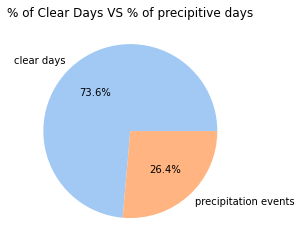

In [20]:
data=[clear_days_per,prec_days_per]
labels=['clear days','precipitation events']
colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,autopct='%.1f%%',colors=colors);
plt.title('% of Clear Days VS % of precipitive days');


**We can find that there were more clear days than days with rain/storms. 73.6% of days were clear, while only 26.4% of days had preciptation events.**

#### 2)Suppose you're planning a vacation to Madrid and hoping for the warmest temperature. Which month might you plan to travel?

In [21]:
#To calculate the warmest temprature it would be better if we would used the mean temprature to calcualte the warmest temprature

warmest_months=df.groupby('month')['mean_temperaturec'].max().sort_values(ascending=False)

In [22]:
warmest_months

month
July         32.0
August       31.0
June         31.0
September    28.0
May          26.0
October      23.0
April        20.0
November     18.0
March        17.0
February     14.0
January      14.0
December     13.0
Name: mean_temperaturec, dtype: float64

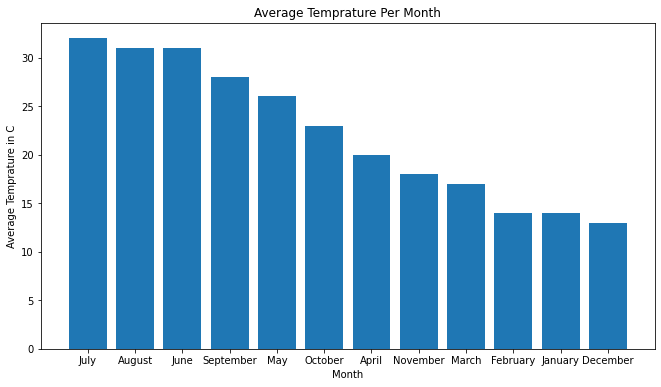

In [23]:
xaxis=list(warmest_months.index)
yaxis=list(warmest_months.values)

plt.rcParams["figure.figsize"] = (11,6)
fig=plt.bar(xaxis,yaxis);
plt.title('Average Temprature Per Month');
plt.xlabel('Month');
plt.ylabel('Average Temprature in C');

**The warmest month to visist Madrid would be in July, August or June. Which makes sense that summer would be the best time to plan a vacation to Madrid and enjoy the weather.**

#### 3)  On which date in the sample did Madrid see the fastest wind gust? What was the weather like on that day?

In [24]:
max_gust=df['max_gust_speedkm/h'].max()

max_gust

103.0

In [25]:
df[df['max_gust_speedkm/h']==max_gust]['date']

309   1997-11-06
Name: date, dtype: datetime64[ns]

In [26]:
df[df['max_gust_speedkm/h']==max_gust]

,cet,max_temperaturec,mean_temperaturec,min_temperaturec,dew_pointc,meandew_pointc,min_dewpointc,max_humidity,mean_humidity,min_humidity,max_sea_level_pressurehpa,mean_sea_level_pressurehpa,min_sea_level_pressurehpa,max_visibilitykm,mean_visibilitykm,min_visibilitykm,max_wind_speedkm/h,mean_wind_speedkm/h,max_gust_speedkm/h,precipitationmm,cloudcover,events,winddirdegrees,date,day,month,year
309,1997-11-06,16.0,11.0,6.0,12.0,5.0,1.0,88.0,70.0,54.0,1003,992,981,10.0,9.0,5.0,58,27,103.0,0.0,5.0,Rain,224,1997-11-06,6,November,1997


**The 6th of Novemeber 1997 withnessed the highest gust speed. There was rain and it was cold, the minimum temprature was 6 degrees while the maximum tempraute was 16 degrees. Having an overall mean temprature of 11 degrees.**

#### 4)  How does the average visibility (Km) compare for clear days vs. foggy days?

In [27]:
#First we have to filter with clear days 

clear_days=df.query("events=='No Events'")

#The we can find the mean visibilty in clear days

clear_vis=clear_days['mean_visibilitykm'].mean()

clear_vis

12.463880654657753

In [28]:
#There are so many events related to foggy days so we will first check how many events have fog.

events= list(df.events.value_counts().index) #creating a list with unique events in our sample

events

['No Events',
 'Rain',
 'Rain-Thunderstorm',
 'Fog',
 'Fog-Rain',
 'Thunderstorm',
 'Rain-Snow',
 'Snow',
 'Rain-Hail-Thunderstorm',
 'Fog-Snow',
 'Fog-Thunderstorm',
 'Tornado',
 'Fog-Rain-Thunderstorm',
 'Fog-Rain-Snow',
 'Rain-Snow-Thunderstorm',
 'Rain-Hail']

In [29]:
#creating a new list called fog_events

fog_events=[]

for event in events:
    if 'Fog' in event: #if the word 'fog' is in the string event
        fog_events.append(event) #then add it to the empty list 
fog_events        

['Fog',
 'Fog-Rain',
 'Fog-Snow',
 'Fog-Thunderstorm',
 'Fog-Rain-Thunderstorm',
 'Fog-Rain-Snow']

In [30]:
#Now we can filter foggy days in our sample 

foggy_days= df[df.events.isin(fog_events)]
foggy_days

,cet,max_temperaturec,mean_temperaturec,min_temperaturec,dew_pointc,meandew_pointc,min_dewpointc,max_humidity,mean_humidity,min_humidity,max_sea_level_pressurehpa,mean_sea_level_pressurehpa,min_sea_level_pressurehpa,max_visibilitykm,mean_visibilitykm,min_visibilitykm,max_wind_speedkm/h,mean_wind_speedkm/h,max_gust_speedkm/h,precipitationmm,cloudcover,events,winddirdegrees,date,day,month,year
10,1997-01-11,16.0,10.0,5.0,10.0,7.0,5.0,100.0,90.0,67.0,1024,1022,1021,10.0,6.0,0.0,11,2,43.988306,0.00,3.000000,Fog,344,1997-01-11,11,January,1997
12,1997-01-13,15.0,9.0,4.0,9.0,4.0,-1.0,100.0,75.0,38.0,1022,1021,1019,10.0,9.0,3.0,11,2,43.988306,0.00,4.000000,Fog,128,1997-01-13,13,January,1997
26,1997-01-27,15.0,8.0,2.0,8.0,6.0,2.0,100.0,84.0,55.0,1028,1027,1026,10.0,7.0,0.0,10,2,43.988306,0.00,6.000000,Fog,5,1997-01-27,27,January,1997
31,1997-02-01,12.0,9.0,6.0,9.0,7.0,6.0,100.0,95.0,77.0,1029,1028,1027,8.0,3.0,0.0,8,0,43.988306,0.00,3.000000,Fog,0,1997-02-01,1,February,1997
32,1997-02-02,13.0,9.0,5.0,9.0,7.0,5.0,100.0,93.0,72.0,1028,1026,1025,5.0,2.0,0.0,10,0,43.988306,0.00,5.000000,Fog-Rain,155,1997-02-02,2,February,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2015-11-17,18.0,10.0,3.0,9.0,6.0,2.0,100.0,81.0,40.0,1030,1027,1024,14.0,7.0,5.0,10,5,26.000000,0.00,3.206066,Fog,324,2015-11-17,17,November,2015
6768,2015-11-18,21.0,11.0,2.0,8.0,5.0,2.0,100.0,71.0,30.0,1032,1028,1025,31.0,14.0,3.0,8,5,43.988306,0.00,3.206066,Fog,358,2015-11-18,18,November,2015
6805,2015-12-25,14.0,6.0,-2.0,6.0,2.0,-2.0,100.0,83.0,45.0,1036,1032,1031,14.0,5.0,2.0,14,5,43.988306,0.00,3.206066,Fog,349,2015-12-25,25,December,2015
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,1030,1027,31.0,14.0,5.0,14,6,43.988306,0.00,8.000000,Fog,38,2015-12-27,27,December,2015


In [31]:
#Then we can calculate the average visibility for foggy days.

fog_vis=foggy_days['mean_visibilitykm'].mean()

fog_vis

6.676375404530744

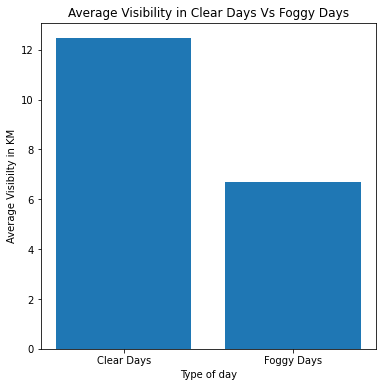

In [36]:
xaxis=['Clear Days','Foggy Days']
yaxis=[clear_vis,fog_vis]

plt.rcParams["figure.figsize"] = (6,6);
plt.bar(xaxis,yaxis);

plt.title('Average Visibility in Clear Days Vs Foggy Days');
plt.xlabel('Type of day');
plt.ylabel('Average Visibilty in KM');

**Clear days have higher visibilty than foggy days. Clear days have an average visibilty of 12.6 KM while foggy days have an average visibilty of 6.67 KM.**

### Conclusion:

The best time to visit Madrid is in the summer ( June,July, August) where the weather is the warmest. 

Madrid throughout the years had witnessed clear days more than days with stormy days.

In November 1997 Madrid had witnessed one of the days with the highest gust/wind speed. 

Visibilty on clear days is much higher than that on foggy days. 